In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
# Load the dataset
file_path = '/content/DisneyMoviesDataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head(5)

,title,Production company,Release date,Running time,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),...,Box office,Story by,Narrated by,Cinematography,Edited by,Screenplay by,Production companies,Adaptation by,Traditional,Simplified
0,Academy Award Review of,Walt Disney Productions,"['May 19, 1937']",41 minutes (74 minutes 1966 release),United States,English,41.0,NaN,NaN,19-05-1937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,"['December 21, 1937 ( Carthay Circle Theatre ,...",83 minutes,United States,English,83.0,1490000.0,418000000.0,21-12-1937,...,$418 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pinocchio,Walt Disney Productions,"['February 7, 1940 ( Center Theatre )', 'Febru...",88 minutes,United States,English,88.0,2600000.0,164000000.0,07-02-1940,...,$164 million,"['Ted Sears', 'Otto Englander', 'Webb Smith', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fantasia,Walt Disney Productions,"['November 13, 1940']",126 minutes,United States,English,126.0,2280000.0,83300000.0,13-11-1940,...,$76.4–$83.3 million,"['Joe Grant', 'Dick Huemer']",Deems Taylor,James Wong Howe,NaN,NaN,NaN,NaN,NaN,NaN
4,The Reluctant Dragon,Walt Disney Productions,"['June 20, 1941']",74 minutes,United States,English,74.0,600000.0,960000.0,20-06-1941,...,"$960,000 (worldwide rentals)",NaN,NaN,Bert Giennon,Paul Weatherwax,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    432 non-null    object 
 1   Production company       392 non-null    object 
 2   Release date             431 non-null    object 
 3   Running time             422 non-null    object 
 4   Country                  428 non-null    object 
 5   Language                 430 non-null    object 
 6   Running time (int)       422 non-null    float64
 7   Budget (float)           273 non-null    float64
 8   Box office (float)       355 non-null    float64
 9   Release date (datetime)  428 non-null    object 
 10  imdb                     416 non-null    float64
 11  metascore                283 non-null    float64
 12  rotten_tomatoes          361 non-null    object 
 13  Directed by              431 non-null    object 
 14  Produced by 

In [ ]:
# Data Preprocessing

In [ ]:
# Convert 'Release date' to datetime format
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

In [ ]:
# Extract year from the 'Release date' and create a new column 'Release year'
df['Release year'] = df['Release date'].dt.year

In [ ]:
# Handling missing values
df.fillna(value={'Budget (float)': 0, 'Box office (float)': 0}, inplace=True)

In [ ]:
# Convert 'Budget' and 'Box office' to numeric
df['Budget (float)'] = pd.to_numeric(df['Budget (float)'], errors='coerce')
df['Box office (float)'] = pd.to_numeric(df['Box office (float)'], errors='coerce')

In [ ]:
# Visualization

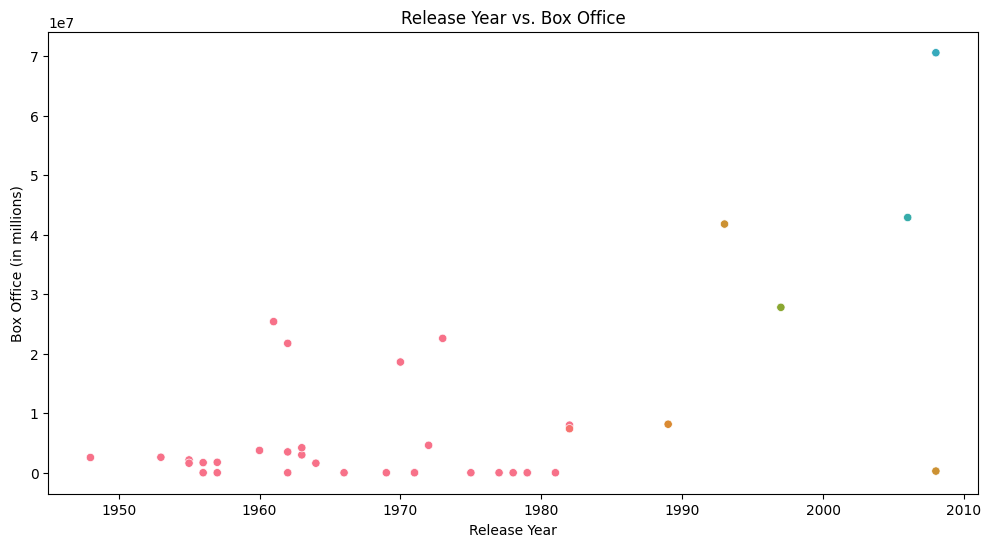

In [ ]:
# Plotting release year vs. box office
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Release year', y='Box office (float)', data=df, hue='Production company', legend=False)
plt.title('Release Year vs. Box Office')
plt.xlabel('Release Year')
plt.ylabel('Box Office (in millions)')
plt.show()

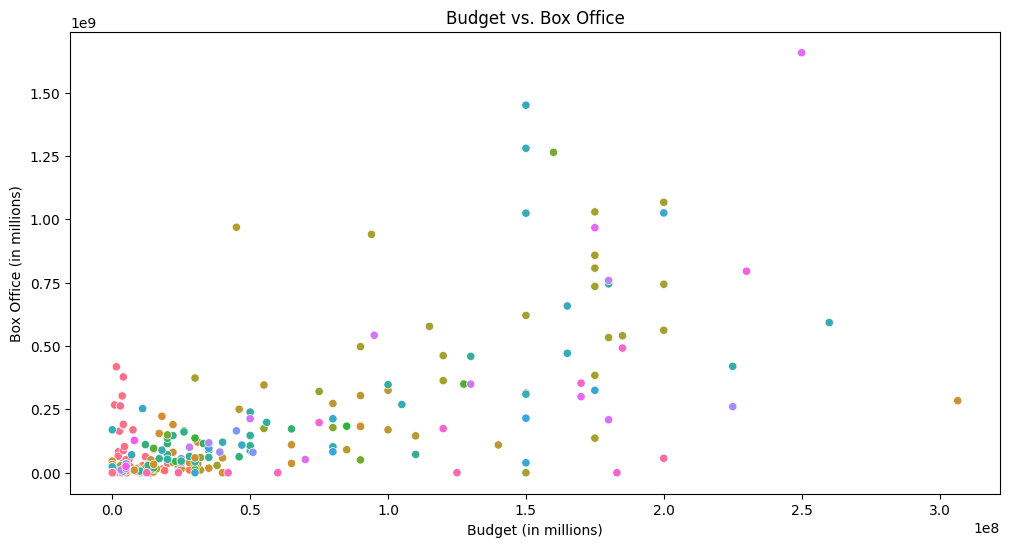

In [ ]:
# Plotting budget vs. box office
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Budget (float)', y='Box office (float)', data=df, hue='Production company', legend=False)
plt.title('Budget vs. Box Office')
plt.xlabel('Budget (in millions)')
plt.ylabel('Box Office (in millions)')
plt.show()

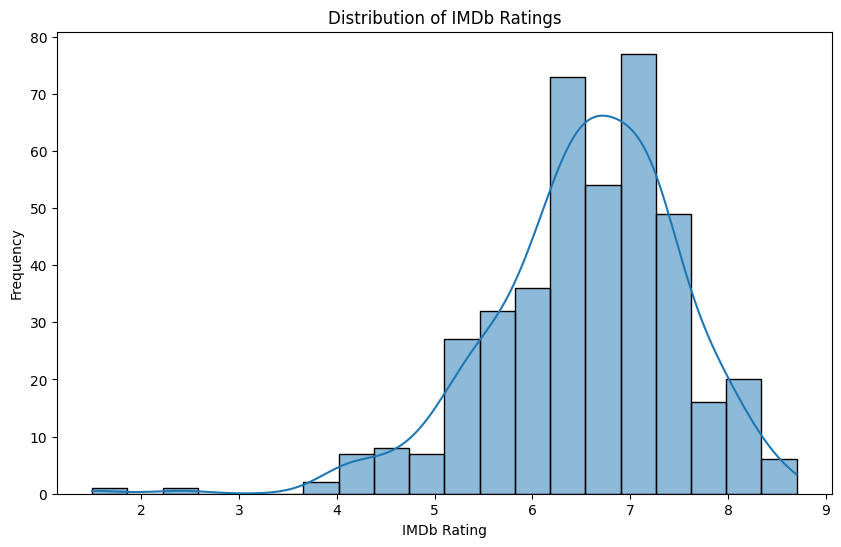

In [ ]:
# Distribution of IMDb ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-15-e91ff8801112>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


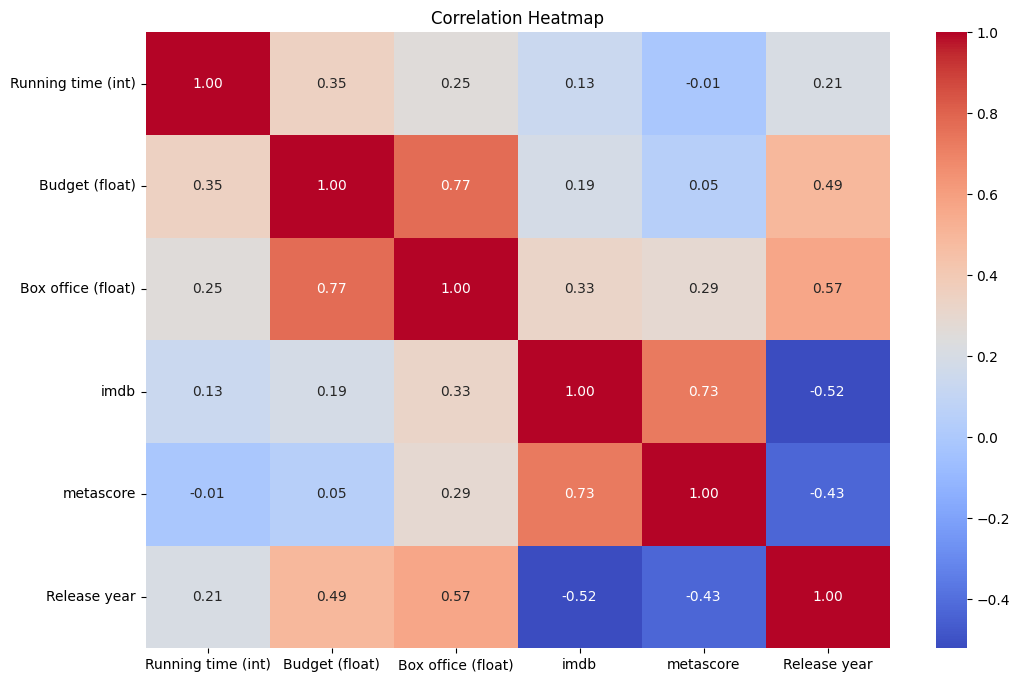

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Feature Engineering
df['Profit'] = df['Box office (float)'] - df['Budget (float)']

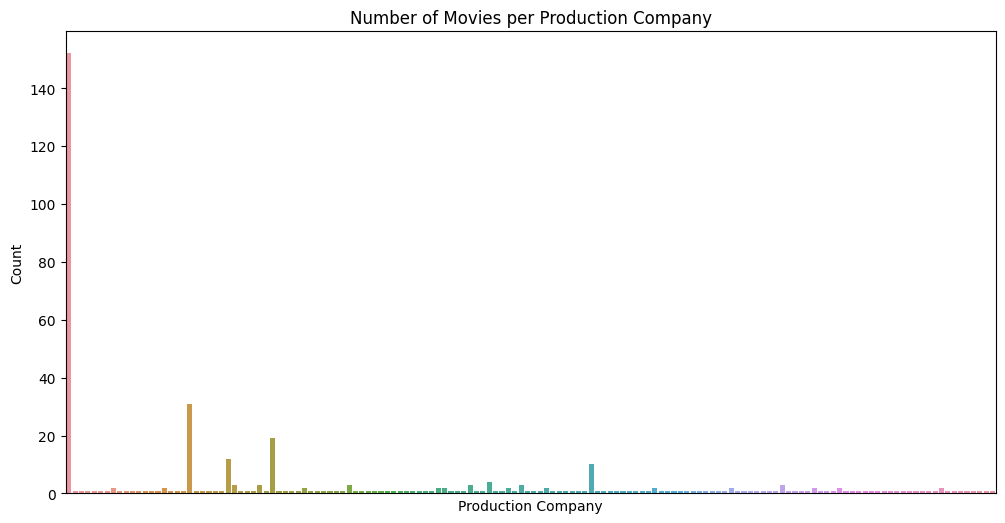

In [ ]:
# Bar chart for count of movies per production company
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Production company', data=df)
plt.title('Number of Movies per Production Company')
plt.xlabel('Production Company')
plt.ylabel('Count')
ax.set_xticks([])  # Remove x-axis ticks
plt.xticks(rotation=45, ha='right')
plt.show()

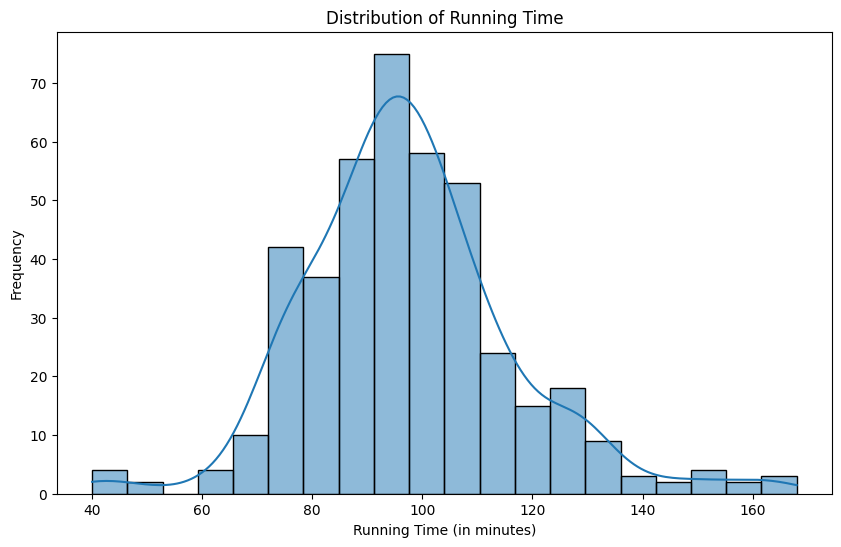

In [ ]:
# Distribution of running time
plt.figure(figsize=(10, 6))
sns.histplot(df['Running time (int)'], bins=20, kde=True)
plt.title('Distribution of Running Time')
plt.xlabel('Running Time (in minutes)')
plt.ylabel('Frequency')
plt.show()

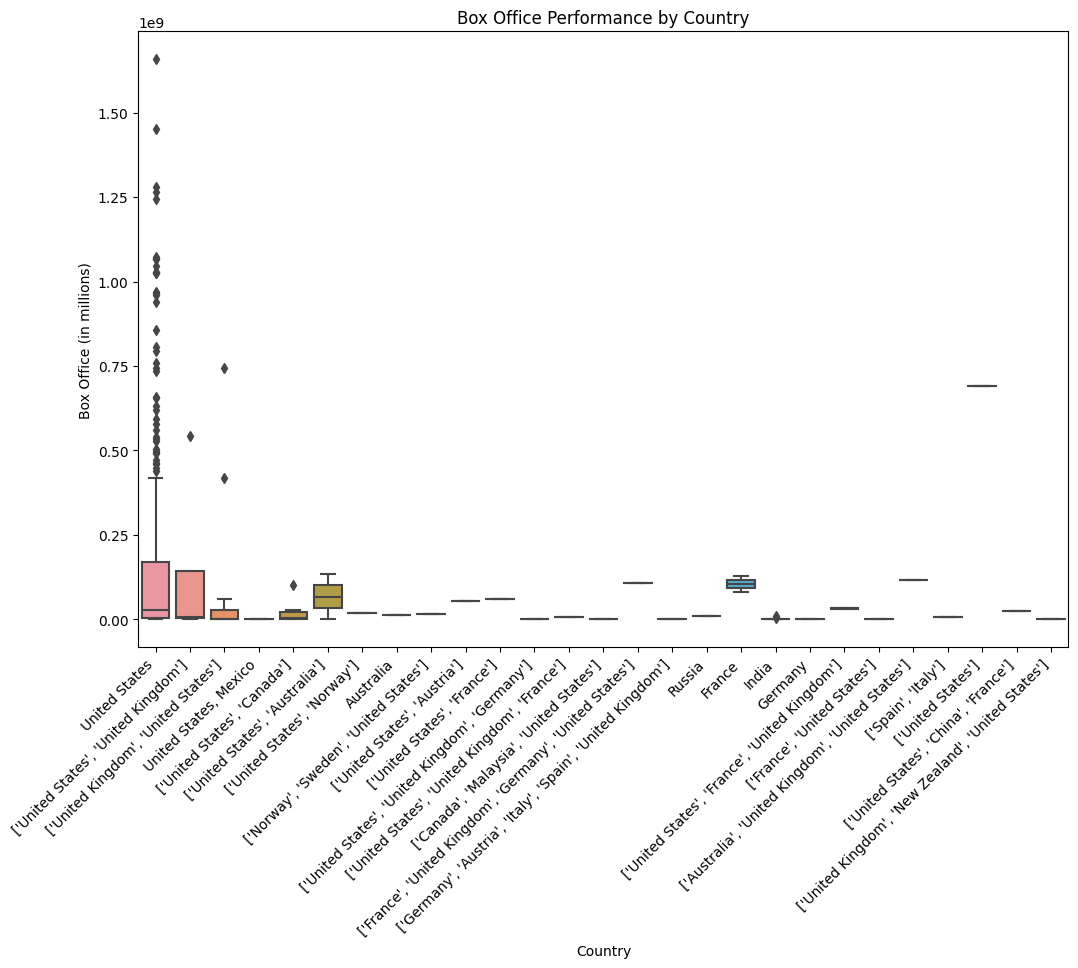

In [ ]:
# Box plot for box office performance by country
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Box office (float)', data=df)
plt.title('Box Office Performance by Country')
plt.xlabel('Country')
plt.ylabel('Box Office (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

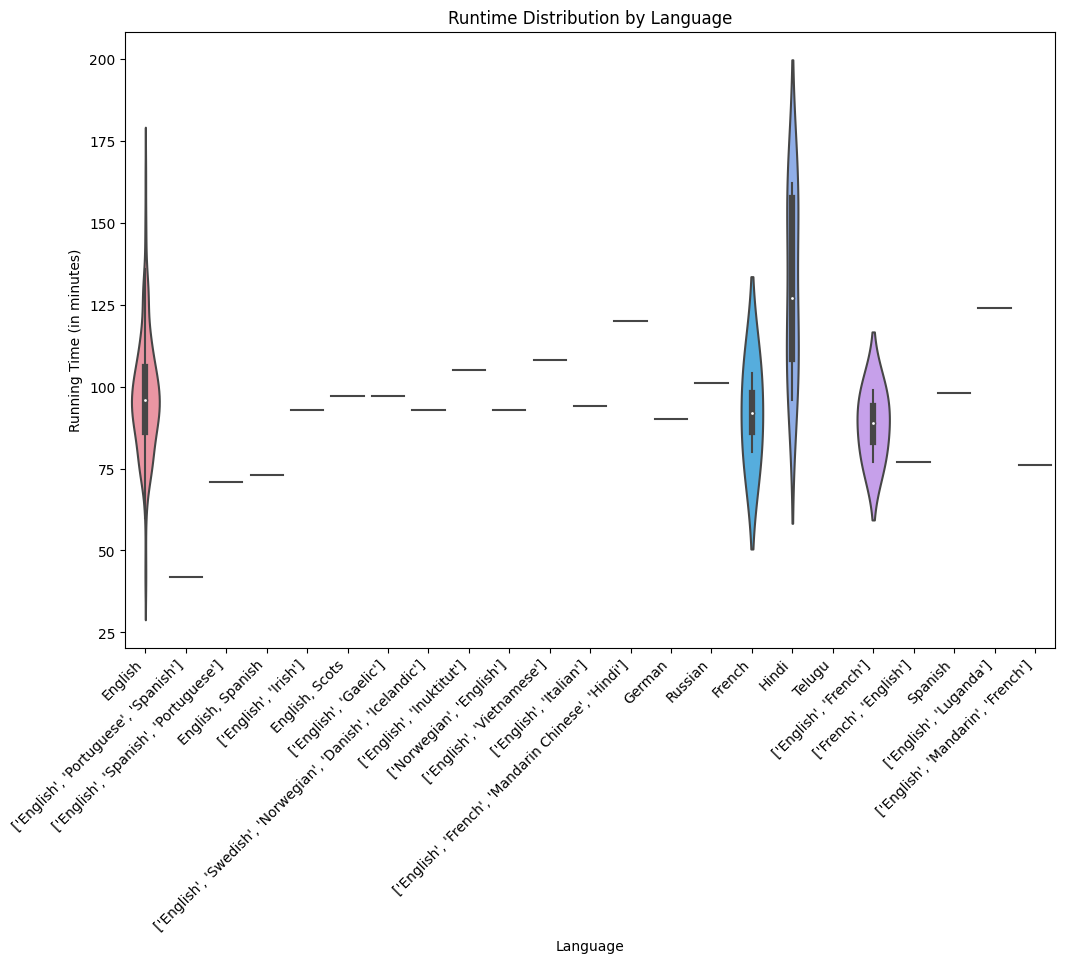

In [ ]:
# Violin plot for runtime distribution by language
plt.figure(figsize=(12, 8))
sns.violinplot(x='Language', y='Running time (int)', data=df)
plt.title('Runtime Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Running Time (in minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

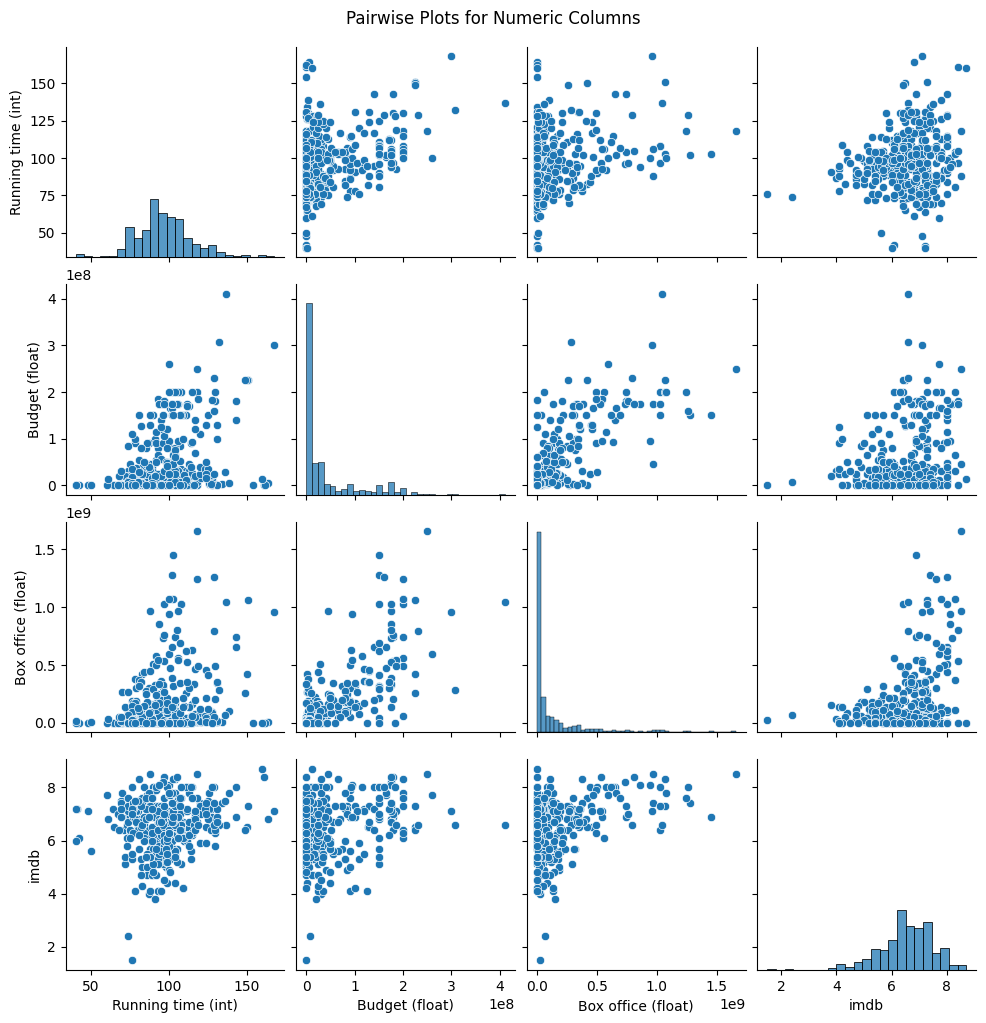

In [ ]:
# Pairwise plots for numeric columns
sns.pairplot(df[['Running time (int)', 'Budget (float)', 'Box office (float)', 'imdb']])
plt.suptitle('Pairwise Plots for Numeric Columns', y=1.02)
plt.show()

In [ ]:
# Director with the highest total box office revenue
director_box_office = df.groupby('Directed by')['Box office (float)'].sum().sort_values(ascending=False)
top_director = director_box_office.idxmax()

print(f"The director with the highest total box office revenue is: {top_director}")

The director with the highest total box office revenue is: Gore Verbinski


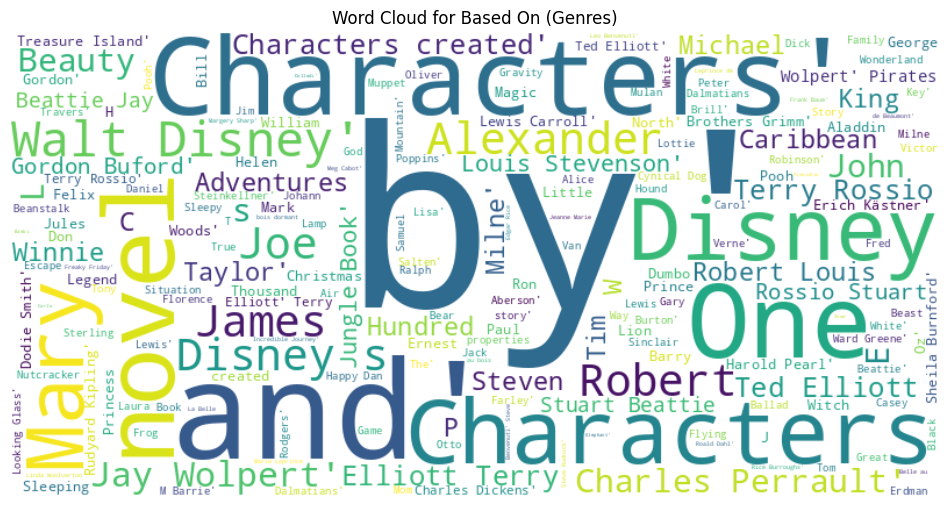

In [ ]:
# Remove NaN values in 'Based on' column
df_cleaned_genres = df.dropna(subset=['Based on'])

# Word cloud for genres after removing NaN values
genres_text_cleaned = ' '.join(str(value) for value in df_cleaned_genres['Based on'])
plt.figure(figsize=(12, 8))
wordcloud_genres_cleaned = WordCloud(width=800, height=400, background_color='white').generate(genres_text_cleaned)
plt.imshow(wordcloud_genres_cleaned, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Based On (Genres)')
plt.show()


In [ ]:
# Outlier Detection and Handling

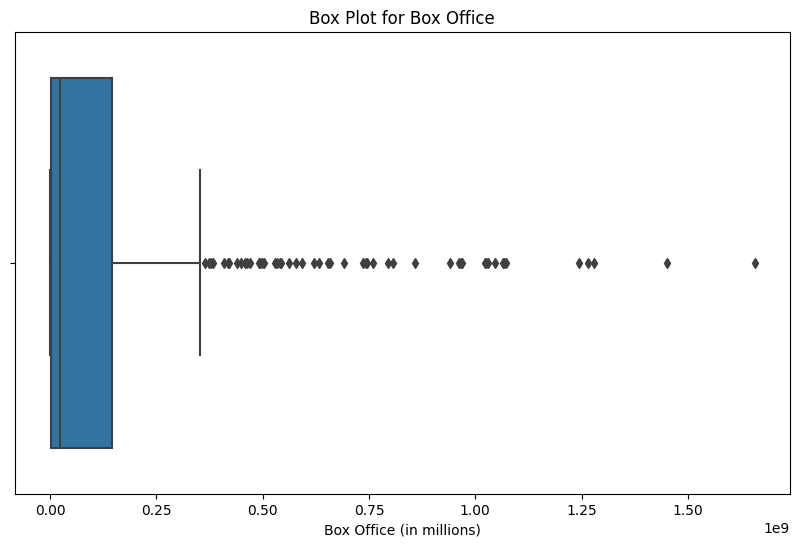

In [ ]:
# Box plot for 'Box office (float)' to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Box office (float)'])
plt.title('Box Plot for Box Office')
plt.xlabel('Box Office (in millions)')
plt.show()

In [ ]:
# Text Data Processing

In [ ]:
# Extract the first director from 'Directed by' column
df['First Director'] = df['Directed by'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else None)

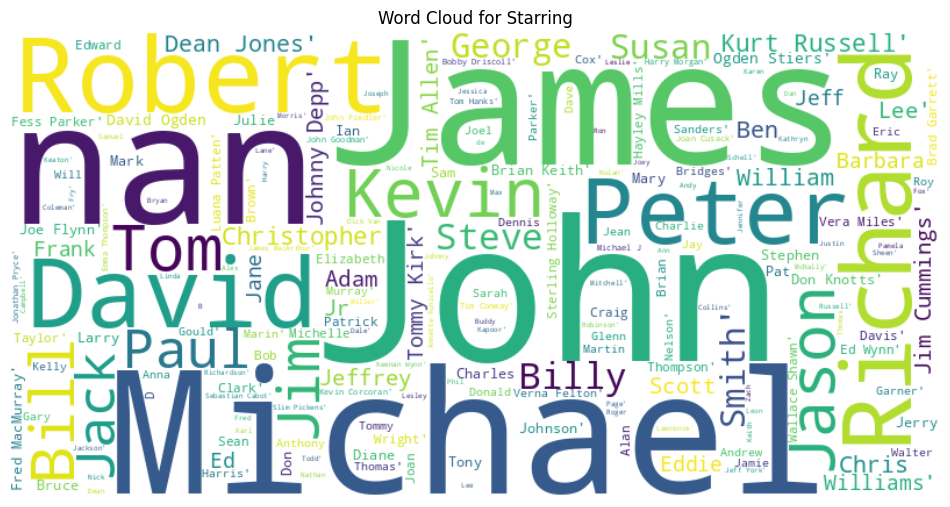

In [ ]:
# Display the most common words in the 'Starring' column
plt.figure(figsize=(12, 8))

# Convert 'Starring' column to strings, replacing any non-string values with empty strings
starring_text = ' '.join(str(value) for value in df['Starring'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(starring_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Starring')
plt.show()